### Eigenchannel plot

C:\Users\sevke\AppData\Local\Temp\ipykernel_24280\3581091140.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  atom_circle = plt.Circle((x, y), atom_radius, color='#FFD700', edgecolor='black', lw=1.5, zorder=2)


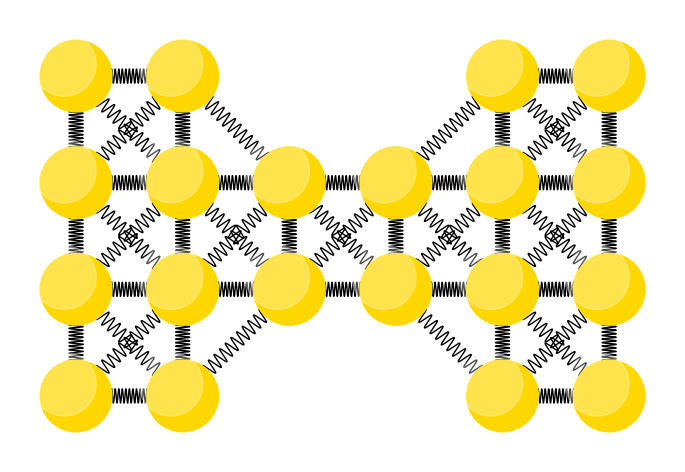

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def draw_system(left_dims, center_dims, right_dims, atom_radius, spring_amp, spring_freq):
    """
    Draws a system of atoms and springs with uniform appearance.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_aspect('equal')
    ax.axis('off')

    atom_spacing = 1.5

    # --- Symmetrie-Anpassung ---
    max_height = max(left_dims[1], center_dims[1], right_dims[1])
    
    y_offset_left = (max_height - left_dims[1]) * atom_spacing / 2.0
    y_offset_center = (max_height - center_dims[1]) * atom_spacing / 2.0
    y_offset_right = (max_height - right_dims[1]) * atom_spacing / 2.0

    # Generate atom positions for each region
    pos_L = [(x * atom_spacing, y_offset_left + y * atom_spacing) for y in range(left_dims[1]) for x in range(left_dims[0])]
    pos_C = [(left_dims[0] * atom_spacing + x * atom_spacing, y_offset_center + y * atom_spacing) for y in range(center_dims[1]) for x in range(center_dims[0])]
    pos_R = [(left_dims[0] * atom_spacing + center_dims[0] * atom_spacing + x * atom_spacing, y_offset_right + y * atom_spacing) for y in range(right_dims[1]) for x in range(right_dims[0])]
    
    atom_positions = pos_L + pos_C + pos_R
    
    # Draw atoms with a gold color, shading, and black border
    for x, y in atom_positions:
        atom_circle = plt.Circle((x, y), atom_radius, color='#FFD700', edgecolor='black', lw=1.5, zorder=2)
        ax.add_artist(atom_circle)
        highlight = plt.Circle((x - atom_radius / 3, y + atom_radius / 3), atom_radius * 0.9, color='white', alpha=0.3, zorder=3)
        ax.add_artist(highlight)

    # Draw springs
    for i in range(len(atom_positions)):
        for j in range(i + 1, len(atom_positions)):
            pos1 = np.array(atom_positions[i])
            pos2 = np.array(atom_positions[j])
            dist = np.linalg.norm(pos2 - pos1)

            is_adjacent = np.isclose(pos1[1], pos2[1], atol=0.1) and np.isclose(dist, atom_spacing, atol=0.1) or \
                          np.isclose(pos1[0], pos2[0], atol=0.1) and np.isclose(dist, atom_spacing, atol=0.1) or \
                          np.isclose(dist, np.sqrt(atom_spacing**2 + atom_spacing**2), atol=0.1)

            if is_adjacent:
                x1, y1 = pos1
                x2, y2 = pos2
                
                dx = x2 - x1
                dy = y2 - y1
                length = np.sqrt(dx**2 + dy**2)
                ux, uy = dx / length, dy / length
                
                x_spring_start = x1 + ux * atom_radius
                y_spring_start = y1 + uy * atom_radius
                x_spring_end = x2 - ux * atom_radius
                y_spring_end = y2 - uy * atom_radius
                
                num_points = 500
                t = np.linspace(0, 1, num_points)
                nx, ny = -uy, ux
                
                # The wiggle is now proportional to the spring's length, ensuring consistent look
                wiggle = spring_amp * np.cos(spring_freq * np.pi * t)
                
                x_spring = (1 - t) * x_spring_start + t * x_spring_end + nx * wiggle
                y_spring = (1 - t) * y_spring_start + t * y_spring_end + ny * wiggle
                
                ax.plot(x_spring, y_spring, color='black', lw=1.0, zorder=1)

    # Adjust plot limits to fit all atoms
    all_x = [p[0] for p in atom_positions]
    all_y = [p[1] for p in atom_positions]
    ax.set_xlim(min(all_x) - atom_radius * 2, max(all_x) + atom_radius * 2)
    ax.set_ylim(min(all_y) - atom_radius * 2, max(all_y) + atom_radius * 2)
    plt.savefig(f"C:\\Users\\sevke\\Desktop\\Uni\\00_Master\\00_Masterarbeit\\03_Plots\\configurations2D\\{left_dims}_{center_dims}_{right_dims}.pdf", bbox_inches='tight')
    plt.show()


# --- System Definition ---
# x, y
left_dims = (2, 4)
center_dims = (2, 2)
right_dims = (2, 4)

# --- Plot the system ---
draw_system(left_dims, center_dims, right_dims, atom_radius=0.5, spring_amp=0.1, spring_freq=20)

C:\Users\sevke\AppData\Local\Temp\ipykernel_19144\2772301390.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  atom_circle = plt.Circle((x, y), atom_radius, color='#FFD700', edgecolor='black', lw=1.5, zorder=2)


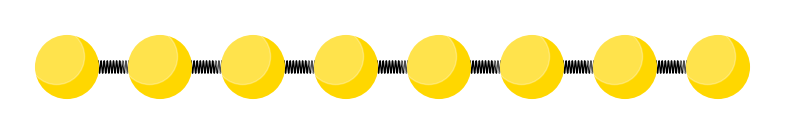

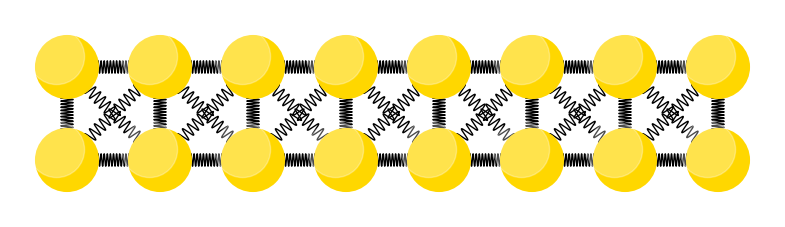

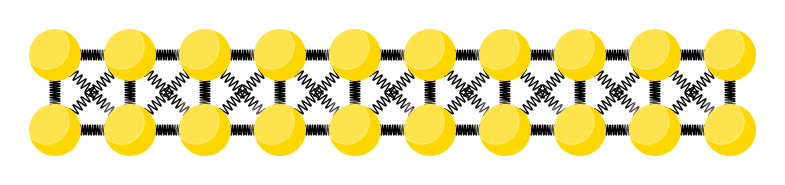

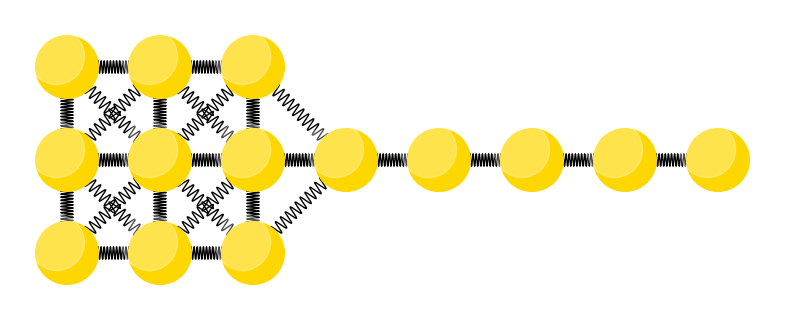

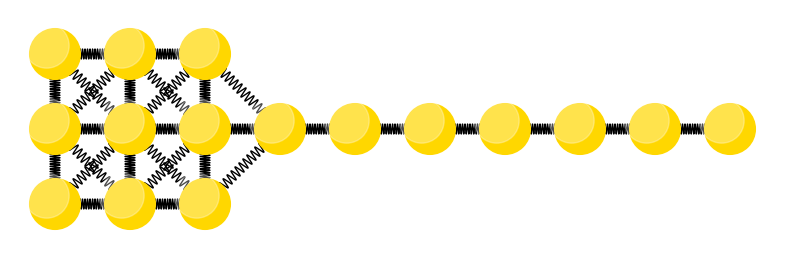

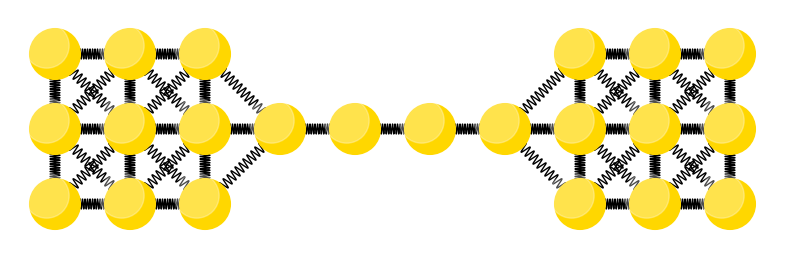

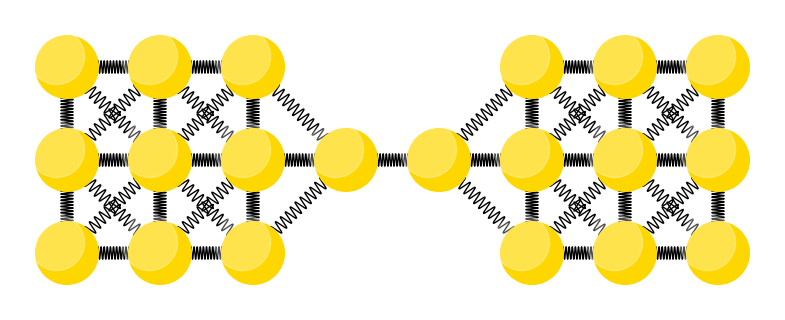

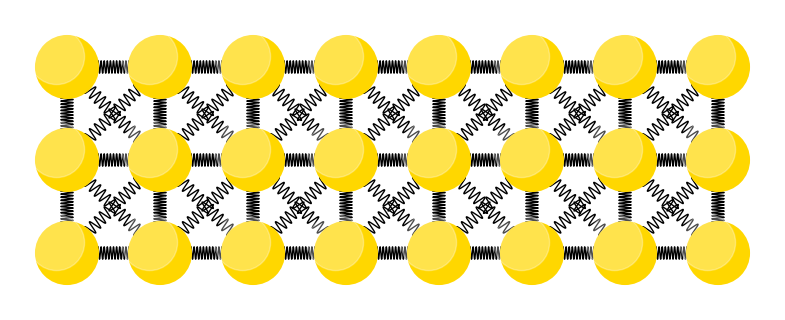

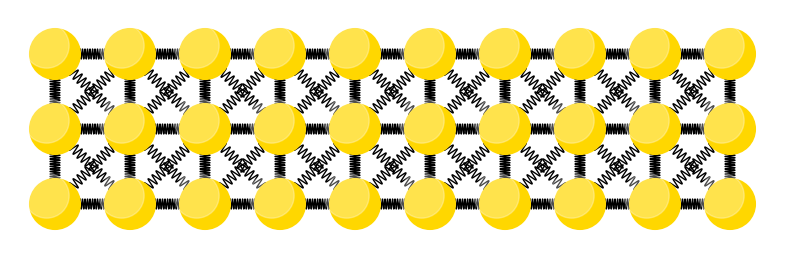

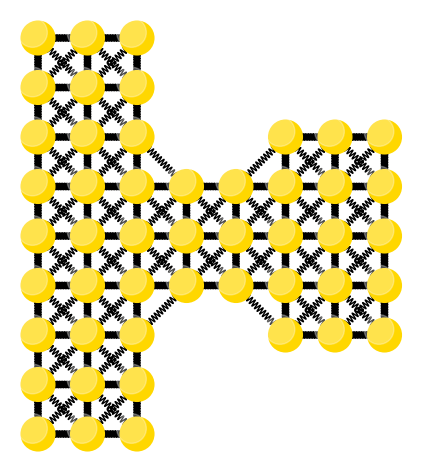

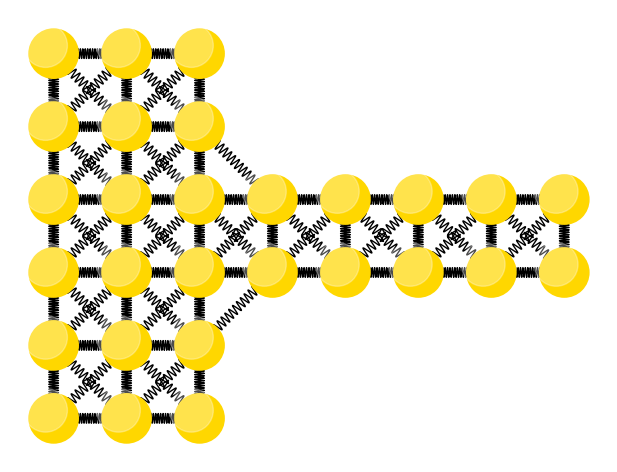

In [43]:
configs = [((3, 1), (2, 1), (3, 1)),
           ((3, 2), (2, 2), (3, 2)),
           ((3, 2), (4, 2), (3, 2)),
           ((3, 3), (2, 1), (3, 1)),
           ((3, 3), (4, 1), (3, 1)),
           ((3, 3), (4, 1), (3, 3)),
           ((3, 3), (2, 1), (3, 3)),
           ((3, 3), (2, 3), (3, 3)),
           ((3, 3), (4, 3), (3, 3)),
           ((3, 9), (2, 3), (3, 5)),
           ((3, 6), (2, 2), (3, 2))
           ]

for left_dims, center_dims, right_dims in configs:
    draw_system(left_dims, center_dims, right_dims, atom_radius=0.5, spring_amp=0.1, spring_freq=20)

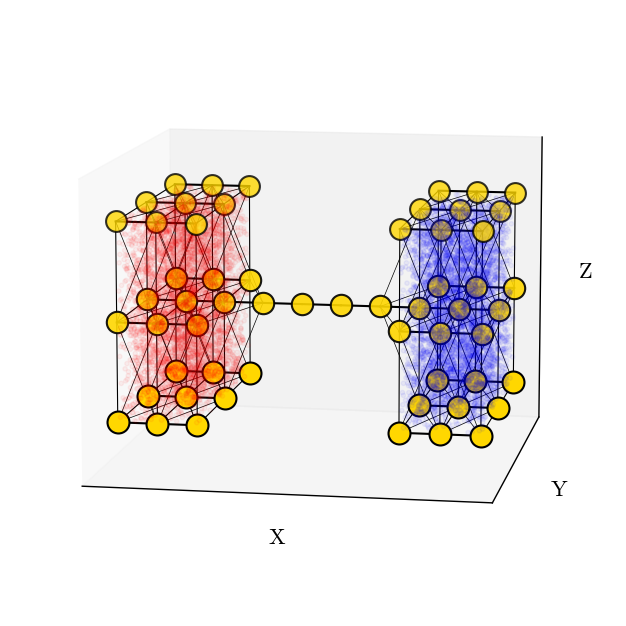

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def draw_system_3d(left_dims, center_dims, right_dims, atom_radius, atom_spacing, coupling_styles, zoom_factor=1.0, elev=15, azim=-60, depth_shading=0.7):
    """
    Draws a 3D system with customizable depth shading for atoms and colored fog for electrodes.
    
    Args:
        left_dims (tuple): Dimensions (x, y, z) of the left electrode.
        center_dims (tuple): Dimensions (x, y, z) of the central region.
        right_dims (tuple): Dimensions (x, y, z) of the right electrode.
        atom_radius (float): Radius of the atoms (for visualization).
        atom_spacing (float): Spacing between adjacent atoms in all directions.
        coupling_styles (dict): A dictionary defining spring types to draw and their linewidth.
        zoom_factor (float): A factor to control the zoom level. 
        elev (float): The elevation angle (vertical tilt) in degrees.
        azim (float): The azimuthal angle (horizontal rotation) in degrees.
        depth_shading (float): A factor to control the intensity of the depth effect (0.0 = none, 1.0 = max).
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('auto')
    
    # --- Symmetrie-Anpassung für Y- und Z-Achse ---
    max_y_dim = max(left_dims[1], center_dims[1], right_dims[1])
    max_z_dim = max(left_dims[2], center_dims[2], right_dims[2])
    
    y_offset_left = (max_y_dim - left_dims[1]) * atom_spacing / 2.0
    y_offset_center = (max_y_dim - center_dims[1]) * atom_spacing / 2.0
    y_offset_right = (max_y_dim - right_dims[1]) * atom_spacing / 2.0

    z_offset_left = (max_z_dim - left_dims[2]) * atom_spacing / 2.0
    z_offset_center = (max_z_dim - center_dims[2]) * atom_spacing / 2.0
    z_offset_right = (max_z_dim - right_dims[2]) * atom_spacing / 2.0
    
    # Generate atom positions for each region
    pos_L = [(x * atom_spacing, y_offset_left + y * atom_spacing, z_offset_left + z * atom_spacing) for z in range(left_dims[2]) for y in range(left_dims[1]) for x in range(left_dims[0])]
    pos_C = [(left_dims[0] * atom_spacing + x * atom_spacing, y_offset_center + y * atom_spacing, z_offset_center + z * atom_spacing) for z in range(center_dims[2]) for y in range(center_dims[1]) for x in range(center_dims[0])]
    pos_R = [(left_dims[0] * atom_spacing + center_dims[0] * atom_spacing + x * atom_spacing, y_offset_right + y * atom_spacing, z_offset_right + z * atom_spacing) for z in range(right_dims[2]) for y in range(right_dims[1]) for x in range(right_dims[0])]
    
    atom_positions = np.array(pos_L + pos_C + pos_R)
    
    # --- Korrektur: Variablen für die Achsenlimits definieren ---
    all_x = atom_positions[:, 0]
    all_y = atom_positions[:, 1]
    all_z = atom_positions[:, 2]

    # --- Generieren des "Nebels" für links und rechts ---
    num_fog_points = 5000  # Anzahl der Punkte für den Nebel
    fog_alpha = 0.05       # Transparenz des Nebels
    
    # Bounding Box für die linke Elektrode
    left_x_min, left_x_max = min(pos_L, key=lambda p: p[0])[0], max(pos_L, key=lambda p: p[0])[0]
    left_y_min, left_y_max = min(pos_L, key=lambda p: p[1])[1], max(pos_L, key=lambda p: p[1])[1]
    left_z_min, left_z_max = min(pos_L, key=lambda p: p[2])[2], max(pos_L, key=lambda p: p[2])[2]
    
    # Zufällige Punkte im linken Bereich generieren und zeichnen (roter Nebel)
    fog_points_L = np.random.rand(num_fog_points, 3)
    fog_points_L[:, 0] = fog_points_L[:, 0] * (left_x_max - left_x_min) + left_x_min
    fog_points_L[:, 1] = fog_points_L[:, 1] * (left_y_max - left_y_min) + left_y_min
    fog_points_L[:, 2] = fog_points_L[:, 2] * (left_z_max - left_z_min) + left_z_min
    ax.scatter(fog_points_L[:, 0], fog_points_L[:, 1], fog_points_L[:, 2], 
               s=10, c='red', alpha=fog_alpha, zorder=0)

    # Bounding Box für die rechte Elektrode
    right_x_min, right_x_max = min(pos_R, key=lambda p: p[0])[0], max(pos_R, key=lambda p: p[0])[0]
    right_y_min, right_y_max = min(pos_R, key=lambda p: p[1])[1], max(pos_R, key=lambda p: p[1])[1]
    right_z_min, right_z_max = min(pos_R, key=lambda p: p[2])[2], max(pos_R, key=lambda p: p[2])[2]
    
    # Zufällige Punkte im rechten Bereich generieren und zeichnen (blauer Nebel)
    fog_points_R = np.random.rand(num_fog_points, 3)
    fog_points_R[:, 0] = fog_points_R[:, 0] * (right_x_max - right_x_min) + right_x_min
    fog_points_R[:, 1] = fog_points_R[:, 1] * (right_y_max - right_y_min) + right_y_min
    fog_points_R[:, 2] = fog_points_R[:, 2] * (right_z_max - right_z_min) + right_z_min
    ax.scatter(fog_points_R[:, 0], fog_points_R[:, 1], fog_points_R[:, 2], 
               s=10, c='blue', alpha=fog_alpha, zorder=0)


    # --- Tiefenwirkung der Atome anpassen ---
    min_z, max_z = np.min(all_z), np.max(all_z)

    for pos in atom_positions:
        # Normalisiere die Z-Position (0 für vorne, 1 für hinten)
        if max_z - min_z > 0:
            z_norm = (pos[2] - min_z) / (max_z - min_z)
        else:
            z_norm = 0.5  # Neutraler Wert, falls nur eine Z-Ebene existiert
        
        # Berechne die Transparenz und die Größe basierend auf dem depth_shading-Faktor
        alpha = 1.0 - z_norm * depth_shading
        size = atom_radius**2 * 1000 * (1.0 - z_norm * depth_shading * 0.5)

        ax.scatter(pos[0], pos[1], pos[2], 
                   s=size, c='#FFD700', edgecolors='black', linewidths=1.5, zorder=2, alpha=alpha)

    # Draw springs based on coupling styles
    for i in range(len(atom_positions)):
        for j in range(i + 1, len(atom_positions)):
            pos1 = atom_positions[i]
            pos2 = atom_positions[j]
            
            d = atom_spacing
            dist_x, dist_y, dist_z = np.abs(pos1 - pos2)
            
            spring_type = None
            if np.isclose(dist_x, d) and np.isclose(dist_y, 0) and np.isclose(dist_z, 0):
                spring_type = 'x'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, d) and np.isclose(dist_z, 0):
                spring_type = 'y'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, 0) and np.isclose(dist_z, d):
                spring_type = 'z'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, d) and np.isclose(dist_z, 0):
                spring_type = 'xy'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, 0) and np.isclose(dist_z, d):
                spring_type = 'xz'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, d) and np.isclose(dist_z, d):
                spring_type = 'yz'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, d) and np.isclose(dist_z, d):
                spring_type = 'xyz'
            
            if spring_type in coupling_styles:
                ax.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], [pos1[2], pos2[2]], 
                        color='black', lw=coupling_styles[spring_type], zorder=1)

    # --- Achsenlimits für den Zoom anpassen ---
    ax.set_xlim(min(all_x) - atom_spacing * zoom_factor, max(all_x) + atom_spacing * zoom_factor)
    ax.set_ylim(min(all_y) - atom_spacing * zoom_factor, max(all_y) + atom_spacing * zoom_factor)
    ax.set_zlim(min(all_z) - atom_spacing * zoom_factor, max(all_z) + atom_spacing * zoom_factor)
    
    # --- Winkel anpassen ---
    ax.view_init(elev=elev, azim=azim)

    # Clean up the plot axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.savefig(r"C:\Users\sevke\Desktop\Uni\00_Master\00_Masterarbeit\03_Plots\LandauBuettiker\atomistic_system_3d.svg", bbox_inches='tight')
    plt.show()

# --- Beispiel für die Verwendung des 3D-Codes ---
left_dims = (3, 3, 3)
center_dims = (4, 1, 1)
right_dims = (3, 3, 3)

coupling_styles = {
    'x': 1.5,
    'y': 0.8,
    'z': 0.8,
    'xy': 0.5,
    'xz': 0.5
}

draw_system_3d(left_dims, center_dims, right_dims, atom_radius=0.5, atom_spacing=1.5, coupling_styles=coupling_styles, zoom_factor=0.5, elev=10, azim=-80, depth_shading=0.2)

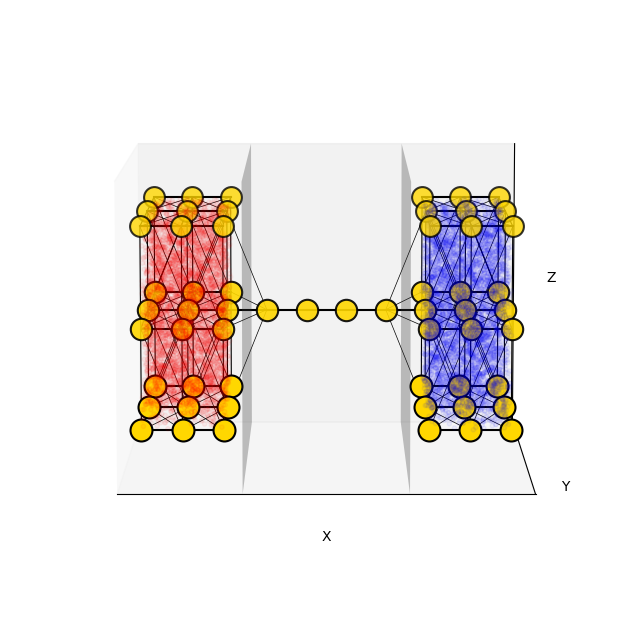

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def draw_system_3d(left_dims, center_dims, right_dims, atom_radius, atom_spacing, coupling_styles, zoom_factor=1.0, elev=15, azim=-60, depth_shading=0.7, plane_extension_factor=1.0):
    """
    Draws a 3D system with customizable depth shading for atoms, colored fog for electrodes, and transparent planes for region separation.
    
    Args:
        left_dims (tuple): Dimensions (x, y, z) of the left electrode.
        center_dims (tuple): Dimensions (x, y, z) of the central region.
        right_dims (tuple): Dimensions (x, y, z) of the right electrode.
        atom_radius (float): Radius of the atoms (for visualization).
        atom_spacing (float): Spacing between adjacent atoms in all directions.
        coupling_styles (dict): A dictionary defining spring types to draw and their linewidth.
        zoom_factor (float): A factor to control the zoom level. 
        elev (float): The elevation angle (vertical tilt) in degrees.
        azim (float): The azimuthal angle (horizontal rotation) in degrees.
        depth_shading (float): A factor to control the intensity of the depth effect (0.0 = none, 1.0 = max).
        plane_extension_factor (float): Factor to control how much the planes extend beyond the atoms.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('auto')
    
    # --- Symmetrie-Anpassung für Y- und Z-Achse ---
    max_y_dim = max(left_dims[1], center_dims[1], right_dims[1])
    max_z_dim = max(left_dims[2], center_dims[2], right_dims[2])
    
    y_offset_left = (max_y_dim - left_dims[1]) * atom_spacing / 2.0
    y_offset_center = (max_y_dim - center_dims[1]) * atom_spacing / 2.0
    y_offset_right = (max_y_dim - right_dims[1]) * atom_spacing / 2.0

    z_offset_left = (max_z_dim - left_dims[2]) * atom_spacing / 2.0
    z_offset_center = (max_z_dim - center_dims[2]) * atom_spacing / 2.0
    z_offset_right = (max_z_dim - right_dims[2]) * atom_spacing / 2.0
    
    # Generate atom positions for each region
    pos_L = [(x * atom_spacing, y_offset_left + y * atom_spacing, z_offset_left + z * atom_spacing) for z in range(left_dims[2]) for y in range(left_dims[1]) for x in range(left_dims[0])]
    pos_C = [(left_dims[0] * atom_spacing + x * atom_spacing, y_offset_center + y * atom_spacing, z_offset_center + z * atom_spacing) for z in range(center_dims[2]) for y in range(center_dims[1]) for x in range(center_dims[0])]
    pos_R = [(left_dims[0] * atom_spacing + center_dims[0] * atom_spacing + x * atom_spacing, y_offset_right + y * atom_spacing, z_offset_right + z * atom_spacing) for z in range(right_dims[2]) for y in range(right_dims[1]) for x in range(right_dims[0])]
    
    atom_positions = np.array(pos_L + pos_C + pos_R)
    
    # --- Variablen für die Achsenlimits definieren ---
    all_x = atom_positions[:, 0]
    all_y = atom_positions[:, 1]
    all_z = atom_positions[:, 2]

    # --- Generieren des "Nebels" für links und rechts ---
    num_fog_points = 5000  # Anzahl der Punkte für den Nebel
    fog_alpha = 0.05       # Transparenz des Nebels
    
    # Bounding Box für die linke Elektrode
    left_x_min, left_x_max = (min(pos_L, key=lambda p: p[0])[0], max(pos_L, key=lambda p: p[0])[0]) if pos_L else (0, 0)
    left_y_min, left_y_max = (min(pos_L, key=lambda p: p[1])[1], max(pos_L, key=lambda p: p[1])[1]) if pos_L else (0, 0)
    left_z_min, left_z_max = (min(pos_L, key=lambda p: p[2])[2], max(pos_L, key=lambda p: p[2])[2]) if pos_L else (0, 0)

    if pos_L:
        fog_points_L = np.random.rand(num_fog_points, 3)
        fog_points_L[:, 0] = fog_points_L[:, 0] * (left_x_max - left_x_min) + left_x_min
        fog_points_L[:, 1] = fog_points_L[:, 1] * (left_y_max - left_y_min) + left_y_min
        fog_points_L[:, 2] = fog_points_L[:, 2] * (left_z_max - left_z_min) + left_z_min
        ax.scatter(fog_points_L[:, 0], fog_points_L[:, 1], fog_points_L[:, 2], 
                   s=10, c='red', alpha=fog_alpha, zorder=0)

    # Bounding Box für die rechte Elektrode
    right_x_min, right_x_max = (min(pos_R, key=lambda p: p[0])[0], max(pos_R, key=lambda p: p[0])[0]) if pos_R else (0, 0)
    right_y_min, right_y_max = (min(pos_R, key=lambda p: p[1])[1], max(pos_R, key=lambda p: p[1])[1]) if pos_R else (0, 0)
    right_z_min, right_z_max = (min(pos_R, key=lambda p: p[2])[2], max(pos_R, key=lambda p: p[2])[2]) if pos_R else (0, 0)
    
    if pos_R:
        fog_points_R = np.random.rand(num_fog_points, 3)
        fog_points_R[:, 0] = fog_points_R[:, 0] * (right_x_max - right_x_min) + right_x_min
        fog_points_R[:, 1] = fog_points_R[:, 1] * (right_y_max - right_y_min) + right_y_min
        fog_points_R[:, 2] = fog_points_R[:, 2] * (right_z_max - right_z_min) + right_z_min
        ax.scatter(fog_points_R[:, 0], fog_points_R[:, 1], fog_points_R[:, 2], 
                   s=10, c='blue', alpha=fog_alpha, zorder=0)

    # --- Hinzufügen der Abgrenzungsflächen im Zwischenraum ---
    # Die Flächen werden um den Abstand atom_spacing * plane_extension_factor vergrößert
    y_start = min(all_y) - atom_spacing * plane_extension_factor
    y_end = max(all_y) + atom_spacing * plane_extension_factor
    z_start = min(all_z) - atom_spacing * plane_extension_factor
    z_end = max(all_z) + atom_spacing * plane_extension_factor
    
    y_range = np.linspace(y_start, y_end, 2)
    z_range = np.linspace(z_start, z_end, 2)
    Y, Z = np.meshgrid(y_range, z_range)
    
    # NEU: Plane zwischen L und C wird in die Mitte der Lücke verschoben
    x_pos_LC = left_dims[0] * atom_spacing - atom_spacing / 2.0
    X_LC = np.full_like(Y, x_pos_LC)
    ax.plot_surface(X_LC, Y, Z, color='gray', alpha=0.3, zorder=-1)
    
    # NEU: Plane zwischen C und R wird in die Mitte der Lücke verschoben
    x_pos_CR = (left_dims[0] + center_dims[0]) * atom_spacing - atom_spacing / 2.0
    X_CR = np.full_like(Y, x_pos_CR)
    ax.plot_surface(X_CR, Y, Z, color='gray', alpha=0.3, zorder=-1)

    # --- Tiefenwirkung der Atome anpassen ---
    min_z, max_z = np.min(all_z), np.max(all_z)

    for pos in atom_positions:
        if max_z - min_z > 0:
            z_norm = (pos[2] - min_z) / (max_z - min_z)
        else:
            z_norm = 0.5
        
        alpha = 1.0 - z_norm * depth_shading
        size = atom_radius**2 * 1000 * (1.0 - z_norm * depth_shading * 0.5)

        ax.scatter(pos[0], pos[1], pos[2], 
                   s=size, c='#FFD700', edgecolors='black', linewidths=1.5, zorder=2, alpha=alpha)

    # Draw springs based on coupling styles
    for i in range(len(atom_positions)):
        for j in range(i + 1, len(atom_positions)):
            pos1 = atom_positions[i]
            pos2 = atom_positions[j]
            
            d = atom_spacing
            dist_x, dist_y, dist_z = np.abs(pos1 - pos2)
            
            spring_type = None
            if np.isclose(dist_x, d) and np.isclose(dist_y, 0) and np.isclose(dist_z, 0):
                spring_type = 'x'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, d) and np.isclose(dist_z, 0):
                spring_type = 'y'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, 0) and np.isclose(dist_z, d):
                spring_type = 'z'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, d) and np.isclose(dist_z, 0):
                spring_type = 'xy'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, 0) and np.isclose(dist_z, d):
                spring_type = 'xz'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, d) and np.isclose(dist_z, d):
                spring_type = 'yz'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, d) and np.isclose(dist_z, d):
                spring_type = 'xyz'
            
            if spring_type in coupling_styles:
                ax.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], [pos1[2], pos2[2]], 
                        color='black', lw=coupling_styles[spring_type], zorder=1)

    # --- Achsenlimits für den Zoom anpassen ---
    ax.set_xlim(min(all_x) - atom_spacing * zoom_factor, max(all_x) + atom_spacing * zoom_factor)
    ax.set_ylim(min(all_y) - atom_spacing * zoom_factor, max(all_y) + atom_spacing * zoom_factor)
    ax.set_zlim(min(all_z) - atom_spacing * zoom_factor, max(all_z) + atom_spacing * zoom_factor)
    
    # --- Winkel anpassen ---
    ax.view_init(elev=elev, azim=azim)

    # Clean up the plot axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.savefig(r"C:\Users\sevke\Desktop\Uni\00_Master\00_Masterarbeit\03_Plots\LandauBuettiker\atomistic_system_3d_neu.svg", bbox_inches='tight')
    plt.show()

# --- Beispiel für die Verwendung des 3D-Codes ---
left_dims = (3, 3, 3)
center_dims = (4, 1, 1)
right_dims = (3, 3, 3)

coupling_styles = {
    'x': 1.5,
    'y': 0.8,
    'z': 0.8,
    'xy': 0.5,
    'xz': 0.5
}

# Ändern Sie den Wert von 'plane_extension_factor', um die Größe der Flächen anzupassen
draw_system_3d(left_dims, center_dims, right_dims, atom_radius=0.5, atom_spacing=1.5, coupling_styles=coupling_styles, zoom_factor=0.5, elev=8, azim=-90, depth_shading=0.2, plane_extension_factor=0.5)

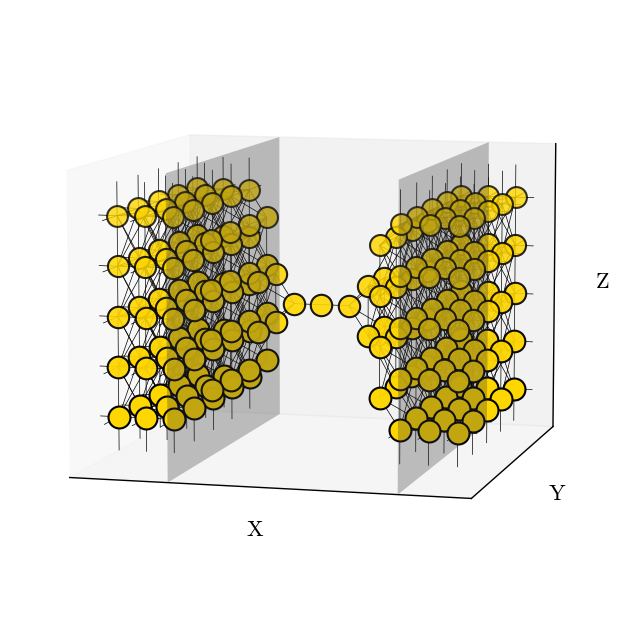

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def draw_system_3d(left_dims, center_dims, right_dims, pyramid_height, atom_radius, atom_spacing, continuation_length=1.0, finer_linewidth=0.5, zoom_factor=1.0, elev=15, azim=-60, depth_shading=0.7, plane_extension=1.0):
    """
    Zeichnet ein 3D-System mit zwei Elektroden, einem zentralen Bauteil und 
    zwei symmetrischen Atompyramiden als Übergang.

    Args:
        left_dims (tuple): Dimensionen (x, y, z) der linken Elektrode.
        center_dims (tuple): Dimensionen (x, y, z) des zentralen Bauteils.
        right_dims (tuple): Dimensionen (x, y, z) der rechten Elektrode.
        pyramid_height (int): Die Höhe der Pyramiden in Atom-Schichten.
        atom_radius (float): Radius der Atome (für die Visualisierung).
        atom_spacing (float): Abstand zwischen benachbarten Atomen.
        continuation_length (float): Länge der Linien, die die Fortsetzung
                                       des Systems symbolisieren.
        finer_linewidth (float): Linienstärke für die Verbindungslinien.
        zoom_factor (float): Ein Faktor, der den Zoom-Level steuert.
        elev (float): Der Elevationswinkel (vertikale Neigung) in Grad.
        azim (float): Der Azimutwinkel (horizontale Drehung) in Grad.
        depth_shading (float): Faktor zur Steuerung der Tiefenwirkung (0.0 = keine, 1.0 = max).
        plane_extension (float): Faktor zur Steuerung, wie weit die Trennflächen
                                über die Atome hinausgehen.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('auto')
    
    # --- Symmetrie-Anpassung für Y- und Z-Achse ---
    max_y_dim = max(left_dims[1], center_dims[1], right_dims[1])
    max_z_dim = max(left_dims[2], center_dims[2], right_dims[2])
    
    y_offset_left = (max_y_dim - left_dims[1]) * atom_spacing / 2.0
    y_offset_center = (max_y_dim - center_dims[1]) * atom_spacing / 2.0
    y_offset_right = (max_y_dim - right_dims[1]) * atom_spacing / 2.0

    z_offset_left = (max_z_dim - left_dims[2]) * atom_spacing / 2.0
    z_offset_center = (max_z_dim - center_dims[2]) * atom_spacing / 2.0
    z_offset_right = (max_z_dim - right_dims[2]) * atom_spacing / 2.0
    
    # --- Atompositionen für jede Region generieren ---
    total_x_layers = left_dims[0] + pyramid_height + center_dims[0] + pyramid_height + right_dims[0]
    center_x_layer = total_x_layers / 2.0
    
    pos_L = []
    pos_P1 = []
    pos_C = []
    pos_P2 = []
    pos_R = []
    
    current_layer = 0

    # Linke Elektrode
    for x_layer in range(left_dims[0]):
        x_pos = (current_layer - center_x_layer + 0.5) * atom_spacing
        for y in range(left_dims[1]):
            for z in range(left_dims[2]):
                pos_L.append((x_pos, y_offset_left + y * atom_spacing, z_offset_left + z * atom_spacing))
        current_layer += 1
    
    x_pos_LP1 = (current_layer - center_x_layer) * atom_spacing
    
    # Linke Pyramide
    for x_layer in range(pyramid_height):
        x_pos = (current_layer - center_x_layer + 0.5) * atom_spacing
        current_y_dim = left_dims[1] - int(np.round((left_dims[1] - center_dims[1]) * (x_layer + 1) / pyramid_height))
        current_z_dim = left_dims[2] - int(np.round((left_dims[2] - center_dims[2]) * (x_layer + 1) / pyramid_height))
        
        y_offset = (max_y_dim - current_y_dim) * atom_spacing / 2.0
        z_offset = (max_z_dim - current_z_dim) * atom_spacing / 2.0
        
        for y in range(current_y_dim):
            for z in range(current_z_dim):
                pos_P1.append((x_pos, y_offset + y * atom_spacing, z_offset + z * atom_spacing))
        current_layer += 1

    # Zentrales Bauteil
    for x_layer in range(center_dims[0]):
        x_pos = (current_layer - center_x_layer + 0.5) * atom_spacing
        for y in range(center_dims[1]):
            for z in range(center_dims[2]):
                pos_C.append((x_pos, y_offset_center + y * atom_spacing, z_offset_center + z * atom_spacing))
        current_layer += 1

    # Rechte Pyramide
    for x_layer in range(pyramid_height):
        x_pos = (current_layer - center_x_layer + 0.5) * atom_spacing
        current_y_dim = center_dims[1] + int(np.round((right_dims[1] - center_dims[1]) * (x_layer + 1) / pyramid_height))
        current_z_dim = center_dims[2] + int(np.round((right_dims[2] - center_dims[2]) * (x_layer + 1) / pyramid_height))
        
        y_offset = (max_y_dim - current_y_dim) * atom_spacing / 2.0
        z_offset = (max_z_dim - current_z_dim) * atom_spacing / 2.0
        
        for y in range(current_y_dim):
            for z in range(current_z_dim):
                pos_P2.append((x_pos, y_offset + y * atom_spacing, z_offset + z * atom_spacing))
        current_layer += 1

    x_pos_P2R = (current_layer - center_x_layer) * atom_spacing

    # Rechte Elektrode
    for x_layer in range(right_dims[0]):
        x_pos = (current_layer - center_x_layer + 0.5) * atom_spacing
        for y in range(right_dims[1]):
            for z in range(right_dims[2]):
                pos_R.append((x_pos, y_offset_right + y * atom_spacing, z_offset_right + z * atom_spacing))
        current_layer += 1
    
    atom_positions = np.array(pos_L + pos_P1 + pos_C + pos_P2 + pos_R)
    
    all_x = atom_positions[:, 0]
    all_y = atom_positions[:, 1]
    all_z = atom_positions[:, 2]

    
    
    # --- Hinzufügen der Abgrenzungsflächen im Zwischenraum ---
    y_start = min(all_y) - atom_spacing * plane_extension
    y_end = max(all_y) + atom_spacing * plane_extension
    z_start = min(all_z) - atom_spacing * plane_extension
    z_end = max(all_z) + atom_spacing * plane_extension
    
    y_range = np.linspace(y_start, y_end, 2)
    z_range = np.linspace(z_start, z_end, 2)
    Y, Z = np.meshgrid(y_range, z_range)
    
    X_LP1 = np.full_like(Y, x_pos_LP1)
    ax.plot_surface(X_LP1, Y, Z, color='gray', alpha=0.3, zorder=-1)
    
    X_P2R = np.full_like(Y, x_pos_P2R)
    ax.plot_surface(X_P2R, Y, Z, color='gray', alpha=0.3, zorder=-1)

    # --- Tiefenwirkung der Atome anpassen ---
    min_z, max_z = np.min(all_z), np.max(all_z)
    
    for pos in atom_positions:
        if max_z - min_z > 0:
            z_norm = (pos[2] - min_z) / (max_z - min_z)
        else:
            z_norm = 0.5
        
        alpha = 1.0 - z_norm * depth_shading
        size = atom_radius**2 * 1000 * (1.0 - z_norm * depth_shading * 0.5)

        ax.scatter(pos[0], pos[1], pos[2], 
                   s=size, c='#FFD700', edgecolors='black', linewidths=1.5, zorder=2, alpha=alpha)

    # --- Verbindungslinien in alle Richtungen zeichnen (korrigierte Logik) ---
    drawn_lines = set()
    # Maximaler Abstand, innerhalb dessen Atome als Nachbarn gelten (geringfügig größer als die längste Diagonale)
    max_dist_sq = (atom_spacing * 1.5)**2  
    
    for i in range(len(atom_positions)):
        p1 = atom_positions[i]
        for j in range(i + 1, len(atom_positions)):
            p2 = atom_positions[j]
            
            dist_sq = np.sum((p1 - p2)**2)
            
            # Wenn der Abstand geringer als der maximale Abstand ist, zeichne eine Linie
            if dist_sq < max_dist_sq:
                line_tuple = tuple(sorted((tuple(p1), tuple(p2))))
                if line_tuple not in drawn_lines:
                    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], 
                            color='black', lw=finer_linewidth, zorder=1)
                    drawn_lines.add(line_tuple)


    # --- Hinzufügen der Fortsetzungslinien an den Rändern ---
    leftmost_x = min(p[0] for p in pos_L)
    rightmost_x = max(p[0] for p in pos_R)
    bottom_y = min(all_y)
    top_y = max(all_y)
    back_z = min(all_z)
    front_z = max(all_z)
    
    # Iterate through all atoms and draw continuation lines at the boundary
    for pos in atom_positions:
        if np.isclose(pos[0], leftmost_x):
            ax.plot([pos[0] - continuation_length, pos[0]], [pos[1], pos[1]], [pos[2], pos[2]],
                    color='black', lw=finer_linewidth, zorder=1)
        if np.isclose(pos[0], rightmost_x):
            ax.plot([pos[0], pos[0] + continuation_length], [pos[1], pos[1]], [pos[2], pos[2]],
                    color='black', lw=finer_linewidth, zorder=1)
        if np.isclose(pos[1], bottom_y):
            ax.plot([pos[0], pos[0]], [pos[1] - continuation_length, pos[1]], [pos[2], pos[2]],
                    color='black', lw=finer_linewidth, zorder=1)
        if np.isclose(pos[1], top_y):
            ax.plot([pos[0], pos[0]], [pos[1], pos[1] + continuation_length], [pos[2], pos[2]],
                    color='black', lw=finer_linewidth, zorder=1)
        if np.isclose(pos[2], back_z):
            ax.plot([pos[0], pos[0]], [pos[1], pos[1]], [pos[2] - continuation_length, pos[2]],
                    color='black', lw=finer_linewidth, zorder=1)
        if np.isclose(pos[2], front_z):
            ax.plot([pos[0], pos[0]], [pos[1], pos[1]], [pos[2], pos[2] + continuation_length],
                    color='black', lw=finer_linewidth, zorder=1)

    # --- Achsenlimits für den Zoom anpassen ---
    ax.set_xlim(min(all_x) - continuation_length - 0.5, 
                max(all_x) + continuation_length + 0.5)
    ax.set_ylim(min(all_y) - continuation_length - 0.5, max(all_y) + continuation_length + 0.5)
    ax.set_zlim(min(all_z) - continuation_length - 0.5, max(all_z) + continuation_length + 0.5)
    
    ax.view_init(elev=elev, azim=azim)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.savefig(r"C:\Users\sevke\Desktop\Uni\00_Master\00_Masterarbeit\03_Plots\LandauBuettiker\3D_System.svg", bbox_inches='tight')
    plt.show()

# --- Beispiel für die Verwendung des 3D-Codes ---
left_dims = (3, 5, 5)
center_dims = (2, 1, 1)
right_dims = (2, 5, 5)
pyramid_height = 3 

# Ändern Sie die Werte, um die Größe der Flächen oder die Länge der Fortsetzungslinien anzupassen
draw_system_3d(left_dims, center_dims, right_dims, pyramid_height, atom_radius=0.5, atom_spacing=1.5, continuation_length=1.0, finer_linewidth=0.5, zoom_factor=0.5, elev=8, azim=-75, depth_shading=0.2, plane_extension=1)
